In [171]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [38]:
boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [39]:
data = boston['data']

In [40]:
data.shape

(506, 13)

In [41]:
feature_names = boston['feature_names']

feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [42]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [43]:
target = boston['target']

target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [44]:
X = pd.DataFrame(data, columns=feature_names)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [50]:
y = pd.DataFrame(target, columns=['price'])

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.1 KB


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [53]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [54]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_pred = lr.predict(X_test)

y_pred.shape

(127, 1)

In [59]:
check_test = pd.DataFrame({
    'y_test': y_test['price'],
    'y_pred': y_pred.flatten()
})

check_test.head(10)

,y_test,y_pred
69,20.9,20.800243
194,29.1,31.693032
247,20.5,19.733377
406,11.9,8.109877
32,13.2,9.138030
223,30.1,29.846201
235,24.0,25.242429
384,8.8,3.258878
432,16.1,21.373219
192,36.4,32.744613


In [61]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']

check_test.head(10)

,y_test,y_pred,error
69,20.9,20.800243,-0.099757
194,29.1,31.693032,2.593032
247,20.5,19.733377,-0.766623
406,11.9,8.109877,-3.790123
32,13.2,9.138030,-4.061970
223,30.1,29.846201,-0.253799
235,24.0,25.242429,1.242429
384,8.8,3.258878,-5.541122
432,16.1,21.373219,5.273219
192,36.4,32.744613,-3.655387


In [62]:
mse1 = (check_test['error'] ** 2).mean()

mse1

28.59838454068347

In [63]:
from sklearn.metrics import mean_squared_error

mean_squared_error(check_test['y_pred'], check_test['y_test'])

28.59838454068347

In [64]:
(np.abs(check_test['error'])).mean()

3.6331746859512086

In [66]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(check_test['y_pred'], check_test['y_test'])

3.6331746859512086

In [67]:
lr.intercept_

array([37.21406331])

In [68]:
lr.coef_

array([[-3.33818404e-02,  4.30698371e-02,  1.62514276e-02,
         2.58145314e+00, -1.78988326e+01,  3.86324162e+00,
         1.86925643e-03, -1.51796935e+00,  2.52937940e-01,
        -1.35511174e-02, -9.03732487e-01,  7.31508000e-03,
        -5.48175664e-01]])

In [69]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

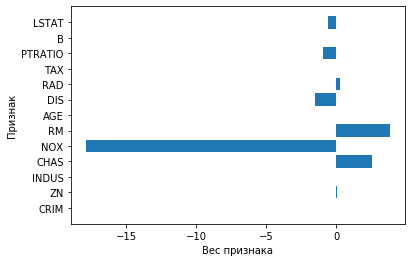

In [70]:
plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel('Вес признака')
plt.ylabel('Признак')

plt.show()

In [71]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.169811,10.708443,11.233984,0.065963,0.559894,6.303958,68.729551,3.772064,9.667546,409.973615,18.423219,356.032533,12.743193
std,6.069003,22.659110,6.975249,0.248546,0.118851,0.694638,28.319920,2.134242,8.760196,170.448907,2.154125,92.393405,7.185792
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.863000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.080745,0.000000,5.130000,0.000000,0.453000,5.895500,45.650000,2.100350,4.000000,279.500000,17.000000,375.955000,7.075000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.211000,78.100000,3.033400,5.000000,335.000000,19.000000,390.960000,11.480000
75%,3.944055,12.500000,18.100000,0.000000,0.647000,6.630000,94.100000,5.222850,24.000000,666.000000,20.200000,395.630000,16.950000
max,45.746100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [80]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

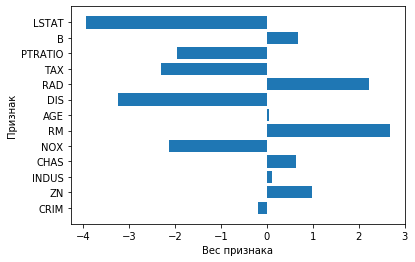

In [82]:
lr.fit(X_train_scaled, y_train)

plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel('Вес признака')
plt.ylabel('Признак')

plt.show()

In [85]:
important_features = [
    feature
    for feature, weight in zip(feature_names, lr.coef_.flatten())
    if np.abs(weight) > 0.5
]

print(important_features)

['ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [88]:
lr.fit(
    X_train_scaled.loc[:, important_features],
    y_train)

y_pred = lr.predict(X_test_scaled.loc[:, important_features])

mse2 = mean_squared_error(y_test, y_pred)

print('mse до: {}'.format(mse1))
print('mse после: {}'.format(mse2))

mse до: 28.59838454068347
mse после: 29.879248920094113


In [90]:
from sklearn.linear_model import Lasso, Ridge

model = Lasso(alpha=0.03)

model.fit(X_train_scaled.loc[:, important_features], y_train)

y_pred = model.predict(X_test_scaled.loc[:, important_features])

mean_squared_error(y_test, y_pred)

29.845636432411286

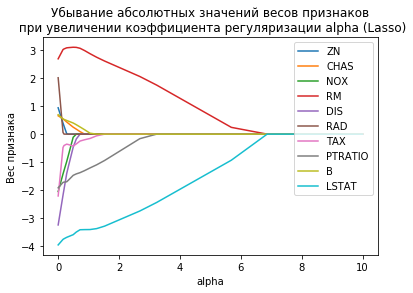

In [103]:
n = 50

coeffs = np.zeros((n, len(important_features)))

alpha_list = np.logspace(-3, 1, n)

for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha=val)
    lasso.fit(X_train_scaled.loc[:, important_features], y_train)
    
    coeffs[i, :] = lasso.coef_.flatten()
    
for i in range(len(important_features)):
    plt.plot(alpha_list, coeffs[:, i])
    
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Lasso)')

plt.xlabel('alpha')
plt.ylabel('Вес признака')

plt.legend(important_features)

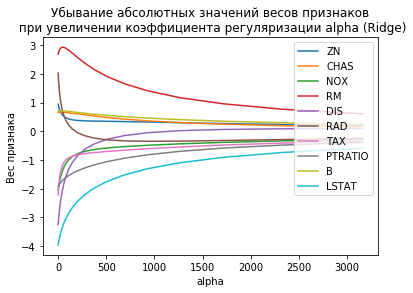

In [106]:
n = 50

coeffs = np.zeros((n, len(important_features)))

alpha_list = np.logspace(-3, 3.5, n)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val)
    ridge.fit(X_train_scaled.loc[:, important_features], y_train)
    
    coeffs[i, :] = ridge.coef_.flatten()
    
for i in range(len(important_features)): 
    plt.plot(alpha_list, coeffs[:, i])
    
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')

plt.xlabel('alpha')
plt.ylabel('Вес признака')

plt.legend(important_features)

In [113]:
data = pd.read_csv('./titanic/train.csv', index_col='PassengerId')

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
target = 'Survived'

y = data[target]
X = data.drop(target, axis=1)

In [117]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [118]:
X.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [120]:
age_mean = X['Age'].mean()

print(age_mean)

X['Age'].fillna(age_mean, inplace=True)

29.69911764705882


In [121]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


In [126]:
X['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [136]:
embark_mode = X['Embarked'].mode()[0]

X['Embarked'].fillna(embark_mode, inplace=True)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


In [137]:
X['Sex'].unique()

array(['male', 'female'], dtype=object)

In [139]:
sex_map = {
    'male': 1,
    'female': 0
}

X['Sex'] = X['Sex'].map(sex_map)

X['Sex']

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Name: Sex, Length: 891, dtype: int64

In [143]:
X = pd.get_dummies(X)

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,3,1,22.0,1,0,7.2500,0,0,1
2,1,0,38.0,1,0,71.2833,1,0,0
3,3,0,26.0,0,0,7.9250,0,0,1
4,1,0,35.0,1,0,53.1000,0,0,1
5,3,1,35.0,0,0,8.0500,0,0,1


In [146]:
X['Pclass'] = X['Pclass'].astype('category')

X = pd.get_dummies(X)

X.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
1,1,22.0,1,0,7.2500,0,0,1,0,0,1
2,0,38.0,1,0,71.2833,1,0,0,1,0,0
3,0,26.0,0,0,7.9250,0,0,1,0,0,1
4,0,35.0,1,0,53.1000,0,0,1,1,0,0
5,1,35.0,0,0,8.0500,0,0,1,0,0,1


In [147]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [149]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')

lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)

In [150]:
from sklearn.metrics import accuracy_score

accuracy_score(y_valid, y_pred)

0.8026905829596412

In [151]:
y_pred_train = lr.predict(X_train)

accuracy_score(y_train, y_pred_train)

0.8098802395209581

In [152]:
y_pred_proba = lr.predict_proba(X_valid)

y_pred_proba[:10]

array([[0.88481218, 0.11518782],
       [0.73211766, 0.26788234],
       [0.87114406, 0.12885594],
       [0.10052182, 0.89947818],
       [0.26677609, 0.73322391],
       [0.08524538, 0.91475462],
       [0.34867249, 0.65132751],
       [0.90497419, 0.09502581],
       [0.26664551, 0.73335449],
       [0.11505878, 0.88494122]])

In [154]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [155]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_valid = pd.DataFrame(scaler.fit_transform(X_valid), columns=X_valid.columns)

In [156]:
clf = SVC(gamma='auto')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_valid)
y_pred_train = clf.predict(X_train)

accuracy_score(y_valid, y_pred)

0.7847533632286996

In [157]:
accuracy_score(y_train, y_pred_train)

0.7874251497005988

In [162]:
c_values = np.logspace(-2, 5, 36)

accuracy_on_valid = []
accuracy_on_train = []

for i, value in enumerate(c_values):
    clf = SVC(C=value, gamma='auto')
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    if i % 5 == 0:
        print('C = {}'.format(value))
        print('\tacc_valid = {}'.format(acc_valid))
        print('\tacc_train = {}'.format(acc_train))
        
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)

C = 0.01
	acc_valid = 0.600896860986547
	acc_train = 0.6212574850299402
C = 0.1
	acc_valid = 0.7847533632286996
	acc_train = 0.7874251497005988
C = 1.0
	acc_valid = 0.7847533632286996
	acc_train = 0.7874251497005988
C = 10.0
	acc_valid = 0.8071748878923767
	acc_train = 0.812874251497006
C = 100.0
	acc_valid = 0.8071748878923767
	acc_train = 0.8203592814371258
C = 1000.0
	acc_valid = 0.8116591928251121
	acc_train = 0.8368263473053892
C = 10000.0
	acc_valid = 0.8161434977578476
	acc_train = 0.8473053892215568
C = 100000.0
	acc_valid = 0.8026905829596412
	acc_train = 0.8592814371257484


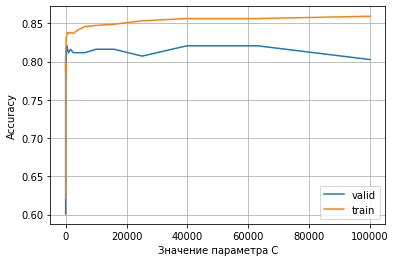

In [163]:
plt.plot(c_values, accuracy_on_valid, label='valid')
plt.plot(c_values, accuracy_on_train, label='train')

plt.xlabel('Значение параметра C')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()

plt.show()

In [167]:
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier

In [169]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = RobustScaler()

In [172]:
cols_for_scaling = ['Age', 'SibSp', 'Parch', 'Fare']

X_train[cols_for_scaling] = scaler.fit_transform(X_train[cols_for_scaling])
X_valid[cols_for_scaling] = scaler.transform(X_valid[cols_for_scaling])

In [173]:
X_train[cols_for_scaling].describe()

,Age,SibSp,Parch,Fare
count,668.000000,668.000000,668.000000,668.000000
mean,-0.017145,0.553892,0.372754,0.787570
std,1.000766,1.185279,0.795588,2.285892
min,-2.252240,0.000000,0.000000,-0.637874
25%,-0.592240,0.000000,0.000000,-0.286822
50%,0.000000,0.000000,0.000000,0.000000
75%,0.407760,1.000000,0.000000,0.713178
max,3.869299,8.000000,6.000000,22.056664


In [182]:
k_values = np.arange(1, 11)

accuracy_on_valid = []
accuracy_on_train = []

for i, value in enumerate(k_values):
    clf = KNeighborsClassifier(n_neighbors=value)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    if i % 2 == 0:
        print('K = {}'.format(value))
        print('\tacc_valid = {}'.format(acc_valid))
        print('\tacc_train = {}\n'.format(acc_train))
        
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)

K = 1
	acc_valid = 0.7713004484304933
	acc_train = 0.9820359281437125

K = 3
	acc_valid = 0.8161434977578476
	acc_train = 0.8727544910179641

K = 5
	acc_valid = 0.8071748878923767
	acc_train = 0.8637724550898204

K = 7
	acc_valid = 0.7847533632286996
	acc_train = 0.8323353293413174

K = 9
	acc_valid = 0.7802690582959642
	acc_train = 0.8173652694610778



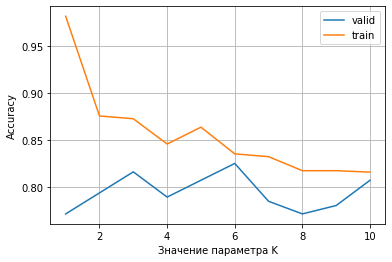

In [183]:
plt.plot(k_values, accuracy_on_valid, label='valid')
plt.plot(k_values, accuracy_on_train, label='train')

plt.xlabel('Значение параметра K')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()

plt.show()

In [185]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.8251121076233184

In [186]:
from sklearn.metrics import confusion_matrix

In [188]:
cm = confusion_matrix(y_valid, y_pred)

cm

array([[123,  11],
       [ 28,  61]])

In [190]:
TP = ((y_valid == 1) & (y_pred == 1)).sum()

TP

61

In [191]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [192]:
precision = TP / (TP + FP)

precision

0.8472222222222222

In [193]:
from sklearn.metrics import precision_score

ps = precision_score(y_valid, y_pred)

ps

0.8472222222222222

In [195]:
from sklearn.metrics import recall_score

rs = recall_score(y_valid, y_pred)

rs

0.6853932584269663

In [207]:
from sklearn.metrics import f1_score

f1s = f1_score(y_valid, y_pred)

f1s_ = 2 * rs * ps / (rs + ps)

f1s, f1s_

(0.7577639751552795, 0.7577639751552795)

In [199]:
y_pred_proba = clf.predict_proba(X_valid)

y_pred_proba[:10]

array([[0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.16666667, 0.83333333]])

In [200]:
y_pred_proba = y_pred_proba[:, 1]

y_pred_proba[:10]

array([0.33333333, 0.16666667, 0.        , 1.        , 0.5       ,
       1.        , 0.83333333, 0.16666667, 0.5       , 0.83333333])

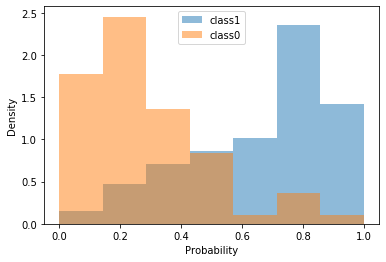

In [202]:
plt.hist(y_pred_proba[y_valid == 1], bins=7, density=True, label='class1', alpha=0.5)
plt.hist(y_pred_proba[y_valid == 0], bins=7, density=True, label='class0', alpha=0.5)

plt.xlabel('Probability')
plt.ylabel('Density')

plt.legend()

In [203]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba, pos_label=1)

fpr

array([0.        , 0.01492537, 0.06716418, 0.08208955, 0.20149254,
       0.39552239, 0.74626866, 1.        ])

In [204]:
th = thresholds[3]

th

0.6666666666666666

In [206]:
print(fpr[3])
print(tpr[3])

0.08208955223880597
0.6853932584269663


In [210]:
fpr_ = (((y_valid == 0) & (y_pred == 1)) & (y_pred_proba>=th)).sum() / (y_valid == 0).sum()
tpr_ = (((y_valid == 1) & (y_pred == 1)) & (y_pred_proba>=th)).sum() / (y_valid == 1).sum()

print(fpr_)
print(tpr_)

0.08208955223880597
0.6853932584269663


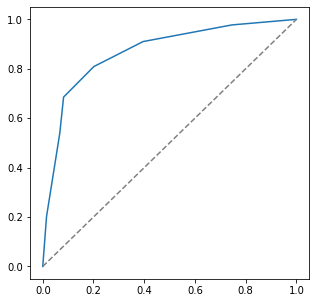

In [211]:
plt.rcParams['figure.figsize'] = 5, 5

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')

In [212]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_valid, y_pred_proba)

0.8679356028844541

In [213]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [223]:
max_depth_values = np.arange(2, 20)

max_depth_values

accuracy_on_valid = []
accuracy_on_train = []

for i, value in enumerate(max_depth_values):
    clf = DecisionTreeClassifier(max_depth=value)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    if i % 4 == 2:
        print('K = {}'.format(value))
        print('\tacc_valid = {}'.format(acc_valid))
        print('\tacc_train = {}\n'.format(acc_train))
        
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)

K = 4
	acc_valid = 0.8071748878923767
	acc_train = 0.842814371257485

K = 8
	acc_valid = 0.757847533632287
	acc_train = 0.8967065868263473

K = 12
	acc_valid = 0.7309417040358744
	acc_train = 0.9565868263473054

K = 16
	acc_valid = 0.7219730941704036
	acc_train = 0.9790419161676647



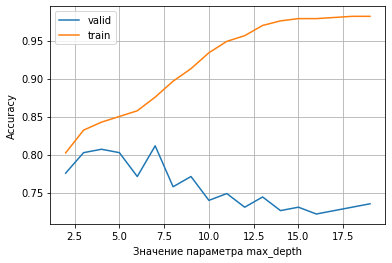

In [224]:
plt.rcParams['figure.figsize'] = 6, 4

plt.plot(max_depth_values, accuracy_on_valid, label='valid')
plt.plot(max_depth_values, accuracy_on_train, label='train')

plt.xlabel('Значение параметра max_depth')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()

In [225]:
clf = DecisionTreeClassifier(max_depth=7)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.8071748878923767

In [305]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [150, 200, 250],
    'max_features': np.arange(5, 9),
    'max_depth': np.arange(5, 10),
}

clf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=parameters,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
)

In [306]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [307]:
%%time
clf.fit(X_train, y_train)

CPU times: user 2min 11s, sys: 1.28 s, total: 2min 12s
Wall time: 2min 17s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [308]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [309]:
GridSearchCV.get_params(clf)

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                

In [310]:
param_columns = [
    column
    for column in cv_results.columns
    if column.startswith('param_')
]

score_columns = ['mean_test_score', 'mean_train_score']

cv_results = (cv_results[param_columns + score_columns]
              .sort_values(by=score_columns, ascending=False))

cv_results.head(10)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,mean_train_score
13,6,5,200,0.829312,0.892219
8,5,7,250,0.826338,0.874257
47,8,8,250,0.823398,0.933385
32,7,7,250,0.823353,0.917664
6,5,7,150,0.823353,0.874255
31,7,7,200,0.823342,0.915046
24,7,5,150,0.823342,0.909433
17,6,6,250,0.823342,0.893339
14,6,5,250,0.823342,0.887727
45,8,8,150,0.821894,0.931516


In [311]:
clf.best_params_

{'max_depth': 6, 'max_features': 5, 'n_estimators': 200}

In [313]:
clf = RandomForestClassifier(max_depth=6, max_features=5, n_estimators=200)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.8251121076233184